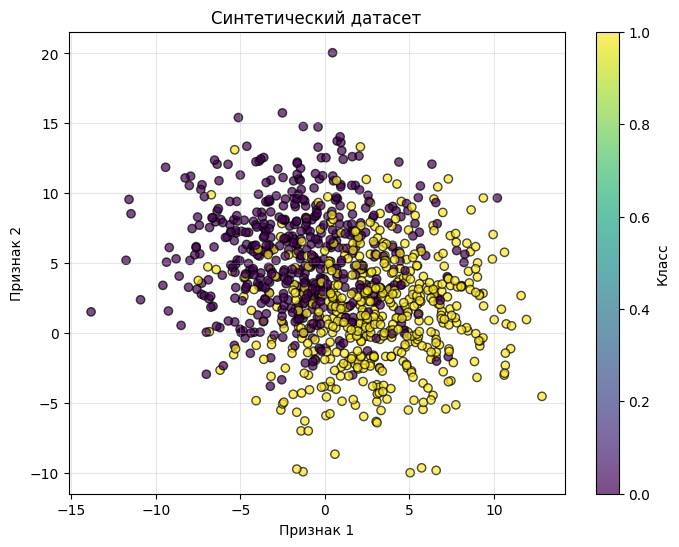

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

X, y = make_blobs(n_samples=1000, 
                  n_features=2, 
                  centers=2, 
                  cluster_std= 3.8, 
                  center_box=(-6.0,6.0),
                  random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.7)
plt.title('Синтетический датасет')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.colorbar(label='Класс')
plt.grid(alpha=0.3)
plt.show()


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = [LogisticRegression(random_state=42, max_iter=1000),
          SVC(random_state=42, probability=True),
          DecisionTreeClassifier(random_state=42),
          RandomForestClassifier(random_state=42)]

model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']

param_grids = [{'C': [0.1, 1, 10]}, # logist
               {'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1]},  # SVM
               {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}, # tree
               {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, 20]}  # forest
               ]

results = []

for i,model in enumerate(models):
    gs = GridSearchCV(estimator=model, 
                      param_grid= param_grids[i], 
                      cv=5, 
                      scoring='roc_auc', 
                      n_jobs=-1)

    if model_names[i] in ['Decision Tree', 'Random Forest']:
        gs.fit(X_train,y_train)
        y_proba = gs.predict_proba(X_test)[:,1]
    else:
        gs.fit(X_train_scaled,y_train)
        y_proba = gs.predict_proba(X_test_scaled)[:,1]


    best_params = gs.best_params_
    auc = roc_auc_score(y_test, y_proba)
    gini = 2 * auc - 1

    print(model_names[i])
    print(f"Лучшие гиперпараметры: {best_params}")
    print(f"AUC-ROC: {auc:.4f}")
    print(f"Коэффициент Джини: {gini:.4f}")


Logistic Regression
Лучшие гиперпараметры: {'C': 0.1}
AUC-ROC: 0.8336
Коэффициент Джини: 0.6672
SVM
Лучшие гиперпараметры: {'C': 0.1, 'gamma': 0.01}
AUC-ROC: 0.8322
Коэффициент Джини: 0.6644
Decision Tree
Лучшие гиперпараметры: {'max_depth': 5, 'min_samples_split': 10}
AUC-ROC: 0.7617
Коэффициент Джини: 0.5235
Random Forest
Лучшие гиперпараметры: {'max_depth': 5, 'n_estimators': 10}
AUC-ROC: 0.8158
Коэффициент Джини: 0.6315
